# Confidence Intervals, CLT & Bootstrap

This notebook demonstrates confidence intervals, the Central Limit Theorem, and bootstrap standard error estimation.

## 1. Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

np.random.seed(42)

## 2. Confidence Interval for a Population Mean (Using CLT)

In [2]:
population = np.random.normal(loc=170, scale=10, size=100_000)

n = 50
sample = np.random.choice(population, size=n, replace=False)

sample_mean = sample.mean()
sample_sd = sample.std(ddof=1)

SE = sample_sd / np.sqrt(n)
z = 1.96

ci_lower = sample_mean - z * SE
ci_upper = sample_mean + z * SE

sample_mean, ci_lower, ci_upper

(170.6028609723995, 167.70621930754382, 173.49950263725518)

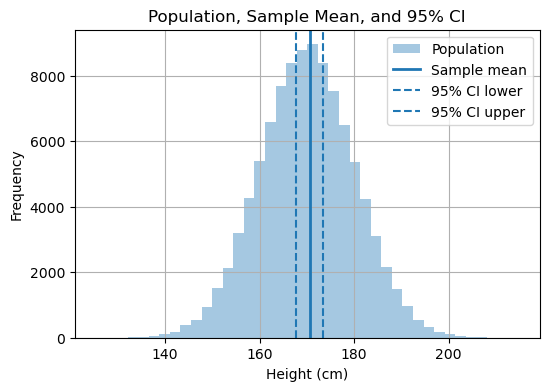

In [3]:
plt.hist(population, bins=40, alpha=0.4, label="Population")
plt.axvline(sample_mean, label="Sample mean", linewidth=2)
plt.axvline(ci_lower, linestyle="--", label="95% CI lower")
plt.axvline(ci_upper, linestyle="--", label="95% CI upper")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Population, Sample Mean, and 95% CI")
plt.legend()
plt.show()

## 3. Confidence Interval for a Proportion

In [4]:
p_true = 0.6
n = 1000

sample_approvals = np.random.binomial(1, p_true, size=n)
phat = sample_approvals.mean()

SE_p = np.sqrt(phat * (1 - phat) / n)
z = 1.96

ci_lower_p = phat - z * SE_p
ci_upper_p = phat + z * SE_p

phat, ci_lower_p, ci_upper_p

(0.637, 0.607195688070348, 0.6668043119296521)

In [5]:
print(f"Sample proportion (phat): {phat:.3f}")
print(f"95% CI: [{ci_lower_p:.3f}, {ci_upper_p:.3f}]")
print(f"Rule of thumb ±1/√n ≈ ±{1/np.sqrt(n):.3f}")

Sample proportion (phat): 0.637
95% CI: [0.607, 0.667]
Rule of thumb ±1/√n ≈ ±0.032


## 4. Repeated Sampling to Illustrate 95% Coverage

In [6]:
mu_true = 170
sigma_true = 10
n = 50
B = 200

contains = []
intervals = []

for _ in range(B):
    sample = np.random.normal(mu_true, sigma_true, size=n)
    xbar = sample.mean()
    s = sample.std(ddof=1)
    SE = s / np.sqrt(n)
    z = 1.96
    low = xbar - z * SE
    high = xbar + z * SE
    intervals.append((low, high))
    contains.append(low <= mu_true <= high)

coverage = np.mean(contains)
coverage

0.925

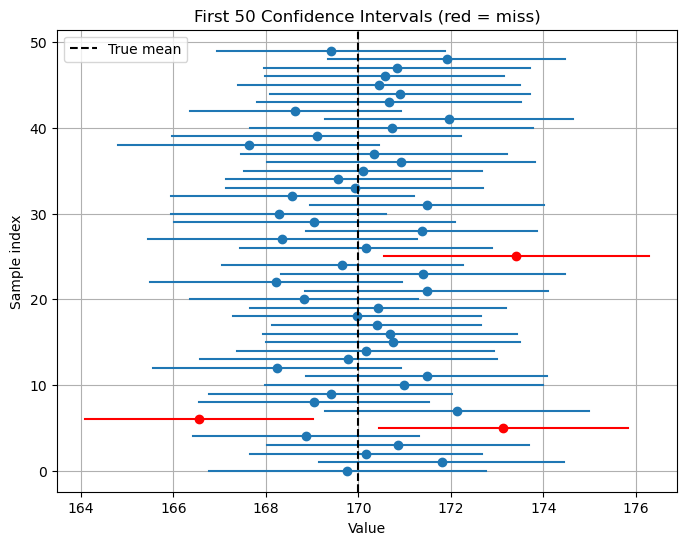

In [7]:
k = 50
plt.figure(figsize=(8, 6))
for i, (low, high) in enumerate(intervals[:k]):
    color = "C0" if (low <= mu_true <= high) else "red"
    plt.plot([low, high], [i, i], color=color)
    plt.plot((low + high)/2, i, "o", color=color)

plt.axvline(mu_true, color="black", linestyle="--", label="True mean")
plt.xlabel("Value")
plt.ylabel("Sample index")
plt.title(f"First {k} Confidence Intervals (red = miss)")
plt.legend()
plt.show()

## 5. Bootstrap Standard Error & CI for a Mean

In [8]:
np.random.seed(123)
data = np.random.exponential(scale=2.0, size=80)

theta_hat = data.mean()

B = 2000
boot_means = []
n = len(data)

for _ in range(B):
    resample = np.random.choice(data, size=n, replace=True)
    boot_means.append(resample.mean())

boot_means = np.array(boot_means)
boot_SE = boot_means.std(ddof=1)

theta_hat, boot_SE

(1.7807273645311015, 0.1769881465609908)

In [9]:
lower_pct = np.percentile(boot_means, 2.5)
upper_pct = np.percentile(boot_means, 97.5)

lower_pct, upper_pct

(1.457570743254227, 2.158316093036645)

In [10]:
z = 1.96
lower_norm = theta_hat - z * boot_SE
upper_norm = theta_hat + z * boot_SE

lower_norm, upper_norm

(1.4338305972715595, 2.1276241317906432)

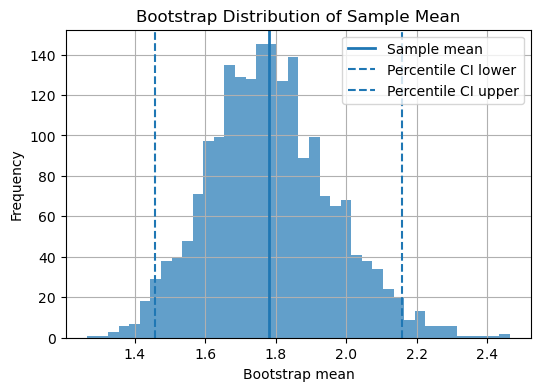

In [11]:
plt.hist(boot_means, bins=40, alpha=0.7)
plt.axvline(theta_hat, label="Sample mean", linewidth=2)
plt.axvline(lower_pct, linestyle="--", label="Percentile CI lower")
plt.axvline(upper_pct, linestyle="--", label="Percentile CI upper")
plt.xlabel("Bootstrap mean")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Sample Mean")
plt.legend()
plt.show()

## 6. Sample Size vs CI Width (Square-Root Law)

In [12]:
mu_true = 170
sigma_true = 10
z = 1.96

ns = [25, 50, 100, 400, 1600]
widths = []

for n in ns:
    SE = sigma_true / np.sqrt(n)
    width = 2 * z * SE
    widths.append(width)

pd.DataFrame({'n': ns, 'CI_width': widths})

,n,CI_width
0,25,7.840000
1,50,5.543717
2,100,3.920000
3,400,1.960000
4,1600,0.980000


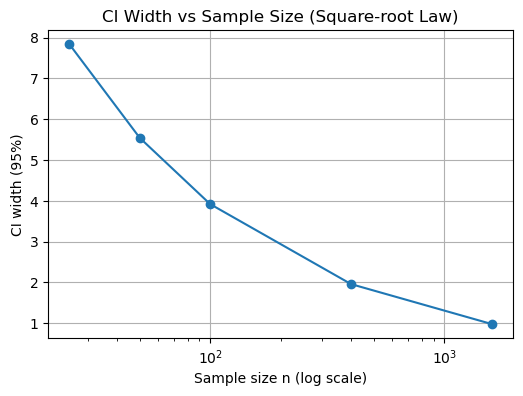

In [13]:
plt.plot(ns, widths, marker="o")
plt.xscale("log")
plt.xlabel("Sample size n (log scale)")
plt.ylabel("CI width (95%)")
plt.title("CI Width vs Sample Size (Square-root Law)")
plt.show()

## 7. Proportion CI with Rule-of-Thumb Comparison

In [14]:
def ci_proportion(phat, n, z=1.96):
    SE = np.sqrt(phat * (1 - phat) / n)
    return phat - z * SE, phat + z * SE

n = 1000
phat_values = [0.2, 0.5, 0.8]

for ph in phat_values:
    ci_low, ci_high = ci_proportion(ph, n)
    approx = 1 / np.sqrt(n)
    print(f"phat = {ph:.2f}")
    print(f"  95% CI: [{ci_low:.3f}, {ci_high:.3f}]")
    print(f"  Rule-of-thumb ±1/√n ≈ ±{approx:.3f}")
    print()

phat = 0.20
  95% CI: [0.175, 0.225]
  Rule-of-thumb ±1/√n ≈ ±0.032

phat = 0.50
  95% CI: [0.469, 0.531]
  Rule-of-thumb ±1/√n ≈ ±0.032

phat = 0.80
  95% CI: [0.775, 0.825]
  Rule-of-thumb ±1/√n ≈ ±0.032

